In [2542]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.interpolate import CubicSpline
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

In [2543]:
filepath_h_end = './Remi-results/Results/H+/h++h.dat'
filepath_h_str = './Remi-results/Results/Straight-line/H+/h++h-st.dat'
filepath_he_end = './Remi-results/Results/He2+/he2++h.dat'
filepath_he_str = './Remi-results/Results/Straight-line/He2+/he2++h-st.dat'
filepath_li_end = './Remi-results/Results/Li3+/li3++h.dat'
filepath_li_str = './Remi-results/Results/Straight-line/Li3+/li3++h-st.dat'
filepath_be_end = './Remi-results/Results/Be4+/be4++h.dat'
filepath_be_str = './Remi-results/Results/Straight-line/Be4+/be4++h-st.dat'


In [2544]:
def safe_divide(numerator, denominator):
    numerator = np.array(numerator, dtype=float)  # None will be converted to np.nan
    result = numerator / denominator
    return result

In [2545]:
## Experimental data 
# H+ 
gealy_energy = [0.063, 0.088, 0.125, 0.177, 0.25, 0.354, 0.5, 0.707, 1, 1.414, 2]
gealy_xsec = np.array([26.5, 28.7, 24.5, 20.2, 21.9, 20.8, 18.9, 17.9, 16.3, 15.1, 13.9]) 
gealy_err = np.array([0.28, 0.2, 0.22, 0.26, 0.19, 0.17, 0.17, 0.17, 0.18, 0.17, 0.17])

hvel_energy = [250, 400, 500, 600]
hvel_xsec = np.array([1.65E-19, 1.55E-20, 5.45E-21, 1.87E-21]) / 1E-16
hvel_err = np.array([0.25E-19, 0.28E-20, 1.0E-21, 0.36E-21]) / 1E-16

# schwab_energy = np.array([2000, 3500, 5000, 7500])
# schwab_xsec = np.array([5.25E-24, 2.14E-25, 3.10E-26, 4.10E-27])

mcc_energy = [1.92, 2.41, 3.04, 3.82, 4.8, 6.05, 7.62, 9.6, 12.1, 15.2, 
                       19.2, 24.1, 30.1, 38.2, 48.0, 60.5, 76.2, 100, 117.5]
mcc_xsec = np.array([13.3, 13.6, 12.1, 11.1, 10.5, 9.85, 8.8, 8.6, 7.5, 6.5, 5.0, 4.1, 
                     2.97, 1.86, 1.10, 0.60, 0.30, 0.124, 0.064]) 

# He2+ 
havner_energy = (0.38, 0.53, 0.65, 0.8, 1.06, 1.49, 2.01, 2.62)
havner_xsec = np.array([0.52, 0.53, 1.01, 1.06, 2.58, 4.14, 5.84, 8.12]) 
havener_err = [0.28, 0.27, 0.22, 0.2, 0.35, 0.57, 0.78, 1.05]

shah_energy = np.array([6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 14.0, 16.0,
    18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 33.7, 37.5, 41.2,
    45.0, 48.7, 52.5, 58.1, 67.5, 77.0, 87.5, 97.5, 108.5, 118.0,
    127.0, 136.0, 145.0, 165.0, 174.0, 183.0, 197.0,
    204.5, 225.5, 241.0, 256.5, 277.5, 285.5, 292.0, 304.0, 327.0, 343.0])/4
shah_xsec = np.array([6.0, 6.9, 7.4, 8.0, 9.15, 9.85, 10.8, 11.3, 11.6, 12.2, 11.6, 12.0, 12.3, 12.4, 12.2, 12.5, 12.3, 11.9, 12.1, 11.8, 
             11.2, 11.1, 10.5, 9.6, 8.6, 6.2, 5.9, 4.5, 3.5, 4.0, 3.1, 2.4, 2.0, 2.0, 1.6, 1.3, 1.15, 0.8,  0.77, 
             0.52, 0.53, 0.47, 0.42, 0.28, 0.28]) 
shah_err = [0.9, 1.0, 1.0, 1.0, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
            np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
            0.8,0.7,0.5,0.4,0.3,0.4,0.2,0.2,0.2,0.2,0.15,0.15,0.11,0.11,0.06,0.08,0.06,0.06,0.04,0.05]


# Li3+ 
seim_energy = np.array([9, 10.5, 12, 13.5, 15.6, 18, 21, 24, 27, 30, 33, 37.8, 42]) / 7
seim_xsec = np.array([4.4, 4.5, 4.73, 6.15, 6.4, 7.6, 8.3, 9, 9.6, 10.7, 12.4, 12.3, 13.1]) 
seim_err = [1.05, 0.86, 0.81, 1.06, 0.92, 0.88, 0.75, 0.70, 0.75, 0.90, 0.70, 0.80, 1.40]

shah_li_energy = np.array([100, 150, 200, 300, 350, 400, 450, 500, 550, 600, 650, 700, 800, 900]) / 7 
shah_li_xsec = np.array([1.6E-15, 1.7E-15, 1.5E-15, 1.1E-15, 7E-16, 6.3E-16, 4.7E-16, 3.0E-16, 2.0E-16, 1.6E-16, 1.7E-16, 1.5E-16, 8.1E-17, 5.2E-17]) / 1E-16


In [2546]:
## Theoretical data

# H+
ryu_energy = [0.1, 0.4, 1, 4, 10, 25, 50, 100, 200, 300, 500]
ryu_xsec = np.array([2.76E-15, 1.99E-15, 1.63E-15, 1.09E-15, 7.95E-16, 3.18E-16, 9.62E-17, 1.54E-17, 1.29E-18, 2.35E-19, 2.2E-20]) / 1E-16

harel_v = np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
harel_h_x = np.array([2.95E-15, 2.28E-15, 1.73E-15, 1.42E-15, 1.19E-15, 1.03E-15, 9.17E-16, 7.99E-16, 6.77E-16, 5.6E-16, 4.55E-16]) / 1E-16

olson_e_h = [37.5, 43, 50, 57, 72, 75]
olson_x_h = np.array([2.37e-16, 2.01e-16, 1.45e-16, 1.10e-16, 6.25e-17, 2.81e-17]) / 1E-16 

abd_e = [1.018e+1,1.784e+1, 2.521e+1, 3.486e+1, 4.416e+1, 5.761e+1, 6.664e+1, 7.433e+1, 8.598e+1, 9.660e+1, 1.874e+2, 2.848e+2, 3.996e+2, 5.118e+2, 5.899e+2, 6.603e+2]
abd_x = [9.674e+0, 6.832e+0, 4.368e+0, 2.446e+0, 1.488e+0, 7.672e-1, 4.745e-1, 3.351e-1, 2.073e-1, 1.370e-1, 9.205e-3, 1.393e-3, 2.143e-4, 5.508e-5, 2.289e-5, 1.034e-5]

kol_e = [10, 25, 40, 60, 100]
kol_x = [8.52,3.687,1.503,0.505,0.086]

# He2+
harel_he_x = np.array([1.2E-17, 2.6E-17, 2.51E-16, 7.08E-16, 1.05E-15, 1.25E-15, 1.32E-15, 1.35E-15, 1.29E-15, 1.2E-15, 1.07E-15]) / 1E-16

min_e = np.array([1, 2, 5, 10, 25, 50, 70, 100, 200, 500, 700])
# min_e_ltdse = [1, 2, 5, 10, 25, 50, 100, 200, 500]
min_x_ltdse = safe_divide(np.array([2.91E-16, 6.64E-16, 1.21E-15, 1.38E-15, 1.07E-15, 4.05E-16, None, 5.66E-17, 4.57E-18, 8.47E-20, None]), 1E-16)
min_x_aocc = safe_divide(np.array([2.51E-16, 6.31E-16, 1.19E-15, 1.34E-15, 1.05E-15, 4.15E-16, 1.81E-16, 6.31E-17, 5.12E-18, 1.03E-19, 1.97E-20]), 1E-16)
min_x_ctmc = safe_divide(np.array([7.57E-16, 8.23E-16, 8.39E-16, 8.32E-16, 7.98E-16, 4.39E-16, 2.16E-16, 6.99E-17, 5.34E-18, 1.19E-19, 2.8E-20]), 1E-16)

toshima_e = np.array([1,2,3,4,5,6.25,7,9,10,12.5,15,20,25,30,50,63,75,100,150,200,400]) 
toshima_he_x = safe_divide(np.array([2.56E-16, 6.37E-16, None, None, None, None, 1.28E-15, None, 1.33E-15, None, 1.29E-15, 1.16E-15, 9.98E-16, 8.34E-16, 3.62E-16,
                2.08E-16, 1.31E-16, 5.59E-17, 1.31E-17, 4.39E-18, 2.52E-19]), 1e-16)

winter_e = np.array([8, 20, 40, 70, 200, 400, 800]) / 4
winter_x = np.array([62.2, 118, 132, 123, 42.4, 7.1, 0.53]) / 10

ludde_he_e = np.array([2,4,5,6,10,25,50])
ludde_he_x = np.array([83.6, 101.57, 109.27, 112.28, 120, 72.3, 29.5]) / 10

olson_e_he = [37.5, 50, 75, 100, 125]
olson_x_he = np.array([7.17e-16, 5.21e-16, 1.89e-16, 1.18e-16, 4.34e-17]) / 1E-16 

end_e_he = np.array([75,85,100,125,175,250,500,1000]) / 1E3 
end_x_he = np.array([9.87e-20, 3.33e-19, 9.74e-19, 3.17e-18, 9.44e-18, 2.00e-17, 6.06e-17, 1.71e-16]) / 1E-16

bransden_e = np.array([14.9, 30, 54.6, 102, 302, 630 , 910]) / 4
bransden_x = [8.9, 12.26, 13.3, 9.2, 1.6, 0.23, 0.05]


# Li3+ 
ryu_li_energy = np.array([0.1, 0.2, 0.5, 1, 2, 5, 10, 25, 50, 75, 100, 200]) 
ryu_li_xsec = np.array([7.03E-16, 8.05E-16, 7.91E-16, 8.42E-16, 7.96E-16, 1.33E-15, 1.75E-15, 1.35E-15, 6.74E-16, 3.25E-16, 1.63E-16, 1.9E-17]) / 1E-16 

ludde_li_e = np.array([2,3,4,6,10,25,50])
ludde_li_x = np.array([53.8, 76.4, 101.7, 146.5, 176.4, 173, 97.3]) / 10

harel_li_x = np.array([8.25E-17, 1.3E-16, 2.6E-16, 5.63E-16, 9.3E-16, 1.42E-15, 1.74E-15, 1.91E-15, 1.97E-15, 1.92E-15, 1.81E-15]) / 1E-16 
 
toshima_li_x = safe_divide(np.array([2.67E-16, None, 7.32E-16, None, 1.18E-15, None, None, None, 1.81E-15, None, None, None, 1.68E-15, None, 7.67E-16, 
                None, 3.13E-16, 1.4E-16, 3.13E-17, 1.05E-17, 5.58E-19]), 1E-16)

fritsch_e = np.array([3,5,7,10,15,20,35,50,70,100]) / 7 
fritsch_x = np.array([16.9, 21.4, 26.4, 35, 51.5, 65, 107, 142, 163, 166])/10

kirchner_e = np.array([1,2,3,4,6,8,12,16,20,30,40,60,80,100]) / 7
kirchner_x = [2.57, 4.92, 7.24, 9.25, 13.86, 16.57, 19.20, 19.70, 19.15, 16.02, 12.11, 6.21, 3.03, 1.64]

# olson_e = [171.7, 255.8, 352, 440.7, 513.4, 607.2, 686.1, 788.3, 868.9]
olson_e_li = [37.5, 50, 75, 100, 125]
olson_x_li = np.array([1.07e-15, 9.67e-16, 4.98e-16, 2.75e-16, 7.33e-17]) / 1E-16 

liu_e = [0.106,0.305, 0.482, 0.783, 3.04, 7.66, 9.86, 14.8, 20.5, 31.4, 50.1, 78.2, 100, 152,202, 291]
liu_x = [0.926, 1.42, 1.75, 2.24, 7.11, 15.7, 17.7, 18.9, 18.2, 14.5, 8.24, 3.31, 1.67, 0.477, 0.171, 0.0425]


# Be4+ 
ludde_be_e = [4, 7, 10, 25, 50]
ludde_be_x = np.array([316, 317, 312, 243, 137]) /10

harel_be_x = np.array([1.48E-15, 2.78E-15, 3.77E-15, 3.69E-15, 3.42E-15, 3.29E-15, 3.14E-15, 3.01E-15, 2.88E-15, 2.71E-15, 2.5E-15]) /1E-16

toshima_be_x = safe_divide(np.array([3.74E-15, 3.76E-15, None, 3.39E-15, None, 3.27E-15, None, 3.11E-15, None, 2.97E-15, None, None, 2.37E-15, None, 1.13E-15, None,
                4.94E-16, 2.33E-16, 6.43E-17, 2.17E-17, 1.17E-18]), 1E-16)

fritsch_be_e = np.array([0.1, 0.2, 0.5, 1,2, 2, 5,10,20])
fritsch_be_x = np.array([1.28, 2.13, 2.98, 3.49, 3.47, 3.68, 3.32, 2.94, 2.28])*10

zia_e = np.array([1,5,10,35,55,70,90,200])
zia_x_ctmc = np.array([9.923, 12.896, 13.159, 9.279, 5.200, 3.209, 1.650, 0.093])
zia_x_qctmc = np.array([27.637, 23.543, 21.257, 10.301, 4.894, 2.872, 1.277, 0.0947])

olson_e_be = [37.5, 50, 75, 100, 125]
olson_x_be = np.array([1.62e-15, 1.36e-15, 9.40e-16, 4.45e-16, 1.34e-16]) / 1E-16 


In [2547]:
def load_data(filepath):
    data = np.loadtxt(filepath)
    return data

In [2548]:
def plot_h(ax):
    data_end = load_data(filepath_h_end)
    data_str = load_data(filepath_h_str)

    x_end = data_end[:, 0]**2 * 25
    y_end = data_end[:, 1] / 100 # cross section in E-16
    x_str = data_str[:, 0]**2 * 25
    y_str = data_str[:, 1] / 100
    harel_e = harel_v**2 * 25

    ax.plot(x_end,y_end, linewidth = 1, color='black', zorder = 5, label = 'This work (END)')
    ax.plot(x_str,y_str, linestyle = 'dashed', linewidth = 1, color='black', zorder = 5, label = 'This work (straight line)')

    ax.errorbar(gealy_energy, gealy_xsec, yerr=gealy_xsec*gealy_err, fmt='^', label = 'Gealy & Van Zyl (1987)', 
                 capsize = 6, mfc='white', mec='black', color='black', zorder = 1)
    ax.errorbar(hvel_energy, hvel_xsec, yerr = hvel_err, fmt='s', capsize = 6, mfc='white', mec='black', color='black',
                  label = 'Hvelplund & Andersen (1982)', zorder = 1)
    ax.scatter(mcc_energy, mcc_xsec, marker='o',color = 'white', edgecolor = 'black', label = 'McClure (1966)')
    ax.scatter(olson_e_h, olson_x_h, marker = '*', color = 'firebrick', label = 'CTMC')
    ax.scatter(kol_e, kol_x, marker = 'D', color='red', label = 'LTDSE')
    ax.scatter(harel_e, harel_h_x, color = 'darkorange', marker='v', label = 'MOCC', zorder = 3)
    ax.scatter(ryu_energy, ryu_xsec, marker='x', color = 'yellowgreen', label = 'UDWA', zorder = 4)
    ax.plot(abd_e, abd_x, color='blue', label = 'QM-CCC')

    ax.tick_params(axis='both', which='major', labelsize=14) 
    ax.set_ylabel(r'$\sigma \ (10^{-16} cm^2)$', fontsize = 16)

    ax.xaxis.set_ticks_position('both')  
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis='x', direction='in', length=8) 
    ax.tick_params(axis='y', direction='in', length=8)
    
    ax.tick_params(axis='x', which='minor', direction='in', length=4, color='black') 
    ax.tick_params(axis='y', which='minor', direction='in', length=4, color='black') 

    ax.grid(False)
    ax.loglog()

    handles, labels = ax.get_legend_handles_labels()
    order = [0,1,2,9,8,3,4,5,6,7]  
    ax.legend([handles[i] for i in order], [labels[i] for i in order], fontsize=14)

    sns.set_theme(style='whitegrid')
    ax.set_xticklabels([])

    ax.text(9E2, 2.5E1, 'A', fontweight='bold', fontsize=20)


In [2549]:
def plot_he(ax):
    data_end = load_data(filepath_he_end)
    data_str = load_data(filepath_he_str)

    x_end = data_end[:, 0]**2 * 25
    y_end = data_end[:, 1] / 100 # cross section in E-16
    x_str = data_str[:, 0]**2 * 25
    y_str = data_str[:, 1] / 100

    harel_e = harel_v**2 * 25

    palette = sns.color_palette("bright")

    ax.plot(x_end,y_end, linewidth = 1, color='black', zorder = 5, label = 'This work (END)')
    ax.plot(x_str,y_str, linestyle = 'dashed', linewidth = 1, color='black', zorder = 5, label = 'This work (straight line)')

    ax.errorbar(shah_energy, shah_xsec, yerr=shah_err, fmt='o',capsize = 6, mfc='white', mec='black', color='black' , label = 'Shah & Gilbody (1978)')
    ax.errorbar(havner_energy, havner_xsec, yerr=havener_err, fmt='s',capsize = 6, mfc='white', mec='black', color='black', label = 'Havener et al. (2005)')

    ax.scatter(min_e, min_x_ctmc, color = 'firebrick',marker = '*',label = 'CTMC-1')
    ax.scatter(olson_e_he, olson_x_he, color = 'red', marker = '*', label = 'CTMC-2')
    ax.scatter(ludde_he_e, ludde_he_x, marker = 'D',color = 'lightcoral',label='TDSE')
    ax.scatter(min_e, min_x_ltdse, marker = 's',color = 'darkorange',label= 'LTDSE')
    ax.scatter(min_e, min_x_aocc, marker = '^',color = 'yellowgreen',label = 'AOCC-1')
    ax.scatter(toshima_e, toshima_he_x, marker = '^',color = 'green',label = 'AOCC-2')
    ax.scatter(bransden_e, bransden_x, marker = '^', color = 'turquoise',label = 'AOCC-3')
    ax.scatter(harel_e, harel_he_x, marker= 'v', color = 'blue',label = 'MOCC')
    ax.scatter(end_e_he, end_x_he, label = 'END')
    ax.scatter(winter_e, winter_x, marker = 'x',color = 'purple',label='Sturmian')

    ax.tick_params(axis='both', which='major', labelsize=14) 
    # ax.set_ylabel(r'$\sigma \ (10^{-16} cm^2)$', fontsize = 16)
  
    ax.xaxis.set_ticks_position('both')  
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis='x', direction='in', length=8) 
    ax.tick_params(axis='y', direction='in', length=8)
   
    ax.tick_params(axis='x', which='minor', direction='in', length=4, color='black') 
    ax.tick_params(axis='y', which='minor', direction='in', length=4, color='black') 

    ax.grid(False)

    ax.loglog()

    handles, labels = ax.get_legend_handles_labels()
    order = [0,1,12,13,2,3,4,5,6,7,8,9,10,11]  
    ax.legend([handles[i] for i in order], [labels[i] for i in order], fontsize=14, ncol=2)

    sns.set_theme(style='whitegrid')
    ax.set_xticklabels([])

    ax.text(9E2, 1.2E1, 'B', fontweight='bold', fontsize=20)


In [2550]:
def plot_li(ax):
    data_end = load_data(filepath_li_end)
    data_str = load_data(filepath_li_str)

    x_end = data_end[:, 0]**2 * 25
    y_end = data_end[:, 1] / 100 # cross section in E-16
    x_str = data_str[:, 0]**2 * 25
    y_str = data_str[:, 1] / 100

    harel_e = harel_v**2 * 25

    ax.plot(x_end,y_end, linewidth = 1, color='black', zorder = 5, label = 'This work (END)')
    ax.plot(x_str,y_str, linestyle = 'dashed', linewidth = 1, color='black', zorder = 5, label = 'This work (straight line)')

    ax.errorbar(seim_energy, seim_xsec, yerr=seim_err, fmt='s',capsize = 6, mfc='white', mec='black', color='black',
                 label = 'Seim et al. (1981)')

    ax.scatter(shah_li_energy, shah_li_xsec, marker='o', color = 'white', edgecolor = 'black', label='Shah et al. (1978)')
    ax.scatter(olson_e_li, olson_x_li, marker = '*', color = 'firebrick', label = 'CTMC')
    ax.scatter(ludde_li_e, ludde_li_x, marker = 'D', color = 'red',label = 'TDSE')
    ax.scatter(toshima_e, toshima_li_x, marker = '^',color = 'darkorange',label='AOCC')
    ax.scatter(liu_e, liu_x, marker = '^', color = 'yellowgreen', label = '2C-AOCC')
    ax.scatter(fritsch_e, fritsch_x, marker = '^',color = 'green',label = 'AO+')
    ax.scatter(harel_e, harel_li_x, marker = 'v',color = 'turquoise',label = 'MOCC')
    ax.scatter(ryu_li_energy, ryu_li_xsec, marker = 'x',color = 'blue',label = 'UDWA')
    # ax.scatter(kirchner_e, kirchner_e, label = 'Kirchner')


    ax.tick_params(axis='both', which='major', labelsize=14) 
    ax.set_xlabel('E (keV/u)', fontsize = 16)  
    ax.set_ylabel(r'$\sigma \ (10^{-16} cm^2)$', fontsize = 16)

    ax.grid(False)
    ax.xaxis.set_ticks_position('both')  
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis='x', direction='in', length=8) 
    ax.tick_params(axis='y', direction='in', length=8)
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))  
    ax.tick_params(axis='y', which='minor', direction='in', length=4, color='black') 
    ax.tick_params(axis='x', which='minor', direction='in', length=4, color='black') 
    

    ax.loglog()
    handles, labels = ax.get_legend_handles_labels()
    order = [0,1,2,10,3,4,5,6,7,8,9]  
    ax.legend([handles[i] for i in order], [labels[i] for i in order], fontsize=14)
    sns.set_theme(style='whitegrid')

    ax.text(9E2, 1.5E1, 'C', fontweight='bold', fontsize=20)
   

In [2551]:
def plot_be(ax):
    data_end = load_data(filepath_be_end)
    data_str = load_data(filepath_be_str)

    x_end = data_end[:, 0]**2 * 25
    y_end = data_end[:, 1] / 100 # cross section in E-16
    x_str = data_str[:, 0]**2 * 25
    y_str = data_str[:, 1] / 100

    harel_e = harel_v**2 * 25

    ax.plot(x_end,y_end, linewidth = 1, color='black', zorder = 5, label = 'This work (END)')
    ax.plot(x_str,y_str, linestyle = 'dashed', linewidth = 1, color='black', zorder = 5, label = 'This work (straight line)')

    ax.scatter(olson_e_be, olson_x_be, marker='*', color='firebrick', label = 'CTMC-1')
    ax.scatter(zia_e, zia_x_ctmc, marker = '*',color = 'red',label='CTMC-2')
    ax.scatter(zia_e, zia_x_qctmc, marker = '*',color = 'darkorange',label='QCTMC')
    ax.scatter(ludde_be_e, ludde_be_x, marker = 'D',color = 'yellowgreen',label='TDSE')
    ax.scatter(toshima_e, toshima_be_x, marker = '^',color = 'green',label='AOCC')
    ax.scatter(fritsch_be_e, fritsch_be_x, marker = '^',color = 'turquoise',label='AO+')
    ax.scatter(harel_e, harel_be_x, marker = 'v',color = 'blue',label = 'MOCC')

    ax.tick_params(axis='both', which='major', labelsize=14) 
    ax.set_xlabel('E (keV/u)', fontsize = 16)  
    # ax.set_ylabel(r'$\sigma \ (10^{-16} cm^2)$', fontsize = 16)

    ax.grid(False)
    ax.xaxis.set_ticks_position('both')  
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis='x', direction='in', length=8) 
    ax.tick_params(axis='y', direction='in', length=8)
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))  
    ax.tick_params(axis='y', which='minor', direction='in', length=4, color='black') 
    ax.tick_params(axis='x', which='minor', direction='in', length=4, color='black') 
    
   
    ax.loglog()
    ax.legend(fontsize=14)
    sns.set_theme(style='whitegrid')

    ax.text(9E2, 3E1, 'D', fontweight='bold', fontsize=20)


In [2554]:
def plot():
    fig, axs = plt.subplots(2, 2, figsize=(18, 15))  # Create a 2x2 grid of subplots
    plt.subplots_adjust(hspace=0.05, wspace = 0.15)
    plot_h(axs[0, 0]) 
    plot_he(axs[0, 1])  
    plot_li(axs[1, 0])  
    plot_be(axs[1, 1])  

    # plt.savefig('fig4.pdf', format='pdf', dpi=300)
    # plt.savefig('fig4.ps', format='ps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


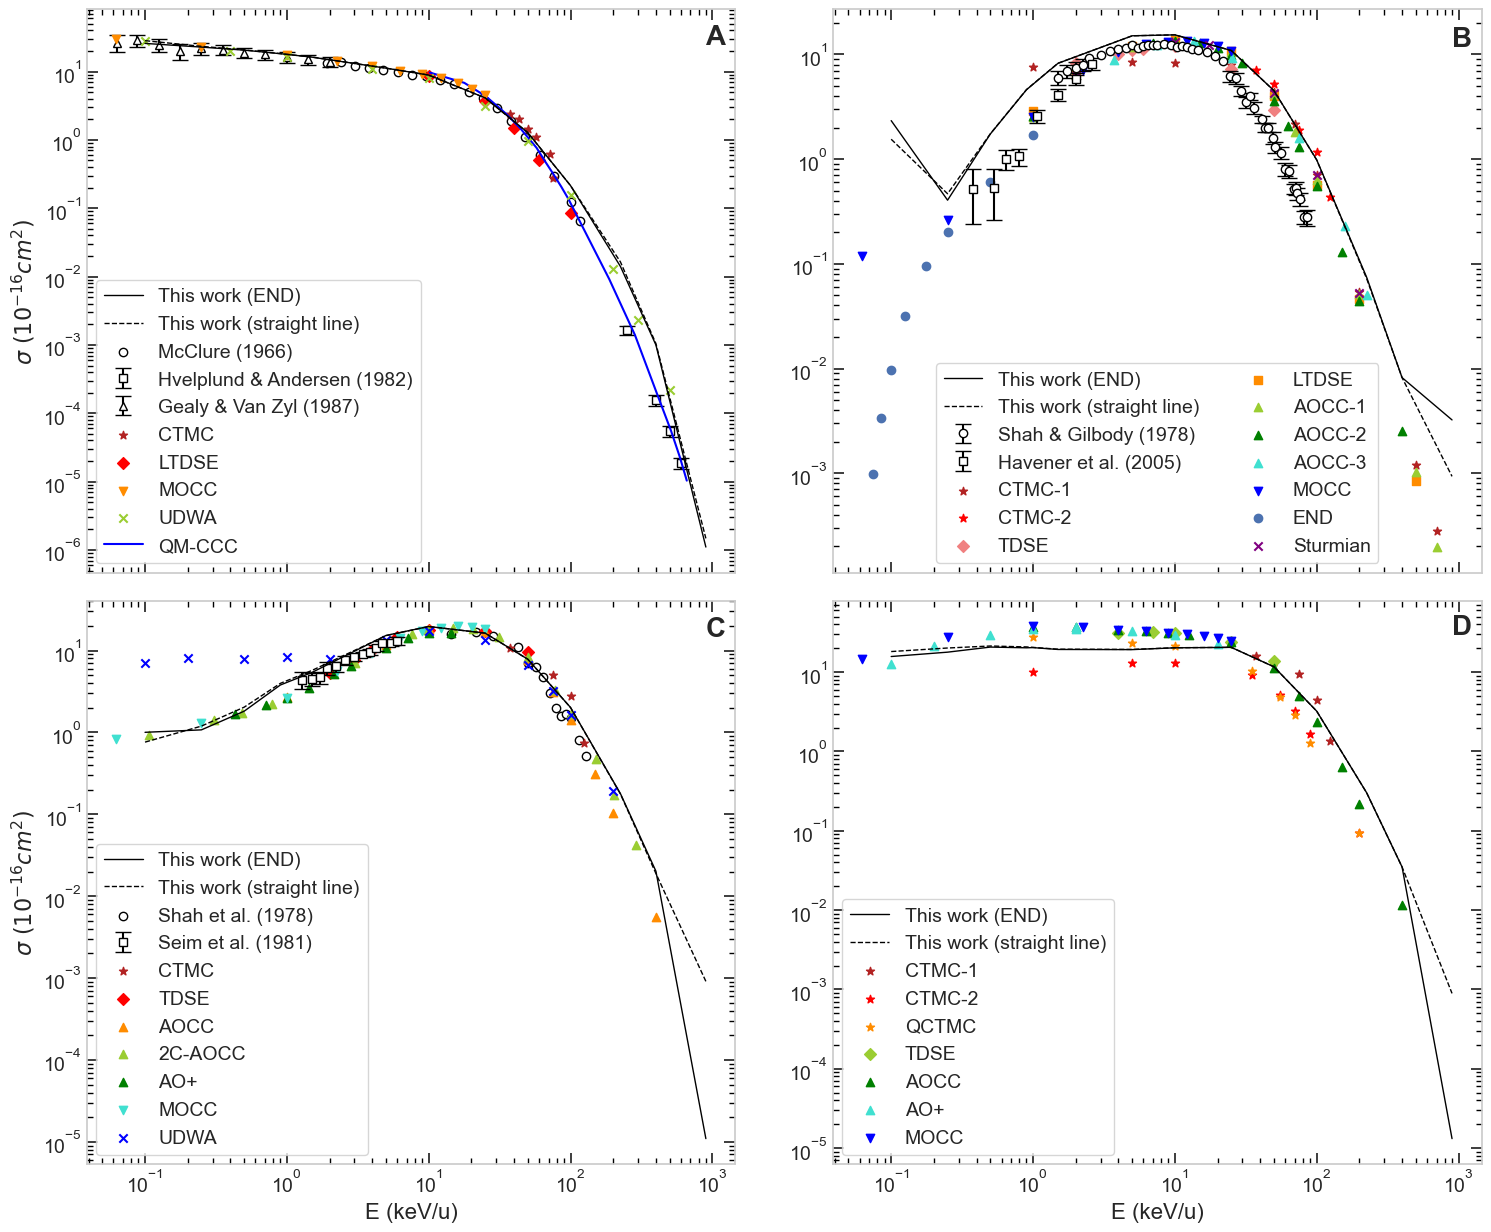

In [2555]:
plot()

need to look into Li data of Kirchner 
